Applying Multiple machine learning algorithm on same dataset so check the accuracy

The Data set is Customer Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\DSCKK2\OneDrive - CELANESE CORPORATION\Python\EXCEL\customer_churn.csv")

EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
customer_5=df.iloc[:,4]

In [9]:
customer_5.head

<bound method NDFrame.head of 0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object>

In [10]:
customer_15=df.iloc[:,14]

In [11]:
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [12]:
senior_male_electronic=df[(df["gender"]=="Male") & (df["SeniorCitizen"]==0) & (df["PaymentMethod"]=="Electronic check")]

In [13]:
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.9,Yes
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009,7703-ZEKEF,Male,0,No,No,23,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.00,1917.1,Yes
7014,9053-EJUNL,Male,0,No,No,41,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes


In [14]:
customer_total_tenure=df[(df["tenure"]>70) | (df["MonthlyCharges"]>100)]

In [15]:
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [16]:
two_mail_yes=df[(df["Contract"]=='Two year') & (df["PaymentMethod"]=='Mailed check') & (df["Churn"]=='Yes')]

In [17]:
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [18]:
customer_333 = df.sample(n=333)

In [19]:
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5378,5320-BRKGK,Female,0,Yes,Yes,58,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,75.80,4415.75,No
572,5756-JYOJT,Female,0,No,No,11,Yes,No,DSL,No,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),64.90,697.25,No
5046,7252-NTGSS,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.15,45.15,No
5743,2384-OVPSA,Female,1,No,No,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,735.9,No
2425,0142-GVYSN,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.30,511.25,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,4431-EDMIQ,Female,0,Yes,Yes,7,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,75.70,554.05,No
649,3509-GWQGF,Male,1,No,No,24,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),70.00,1732.6,No
3677,6656-JWRQX,Female,0,No,No,1,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,30.55,30.55,No
3854,0237-YFUTL,Female,0,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),109.65,5405.8,No


In [20]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data Visualization

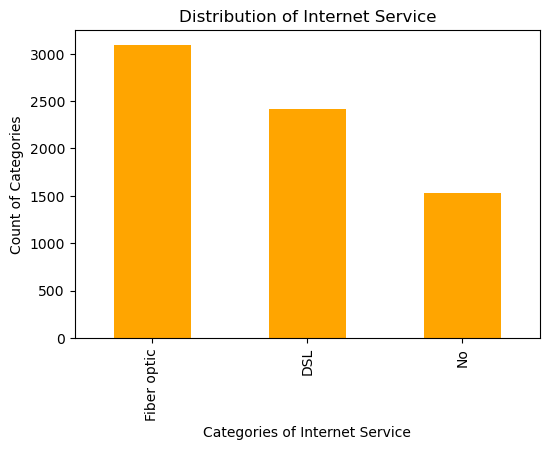

In [21]:
plt.figure(figsize=(6, 4))
df['InternetService'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()


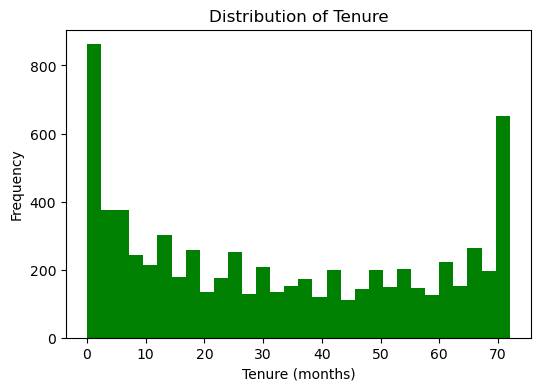

In [22]:
plt.figure(figsize=(6, 4))
plt.hist(df['tenure'], bins=30, color='green')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

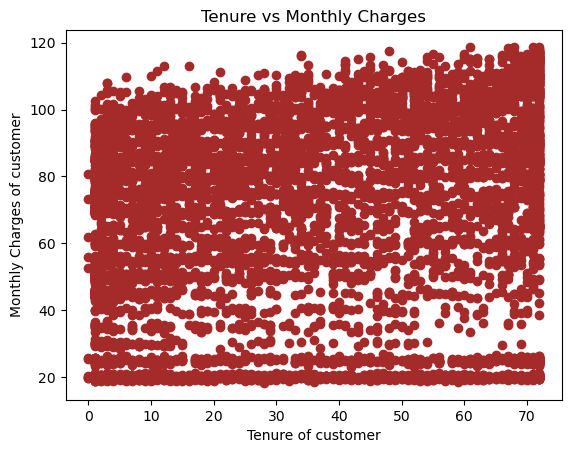

In [23]:
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown')

plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

plt.show()

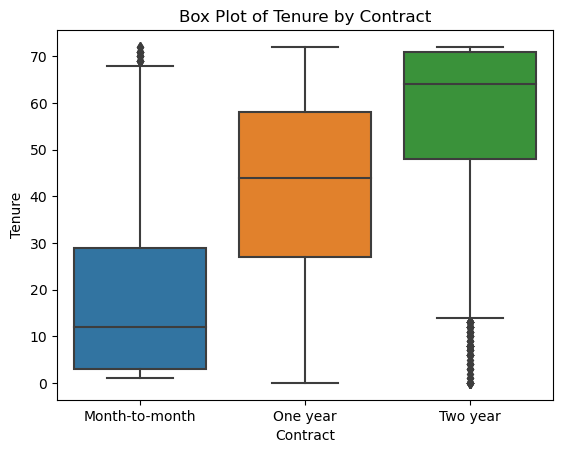

In [24]:
sns.boxplot(x='Contract', y='tenure', data=df)

plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Box Plot of Tenure by Contract')

plt.show()

Model Building

Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<Axes: >

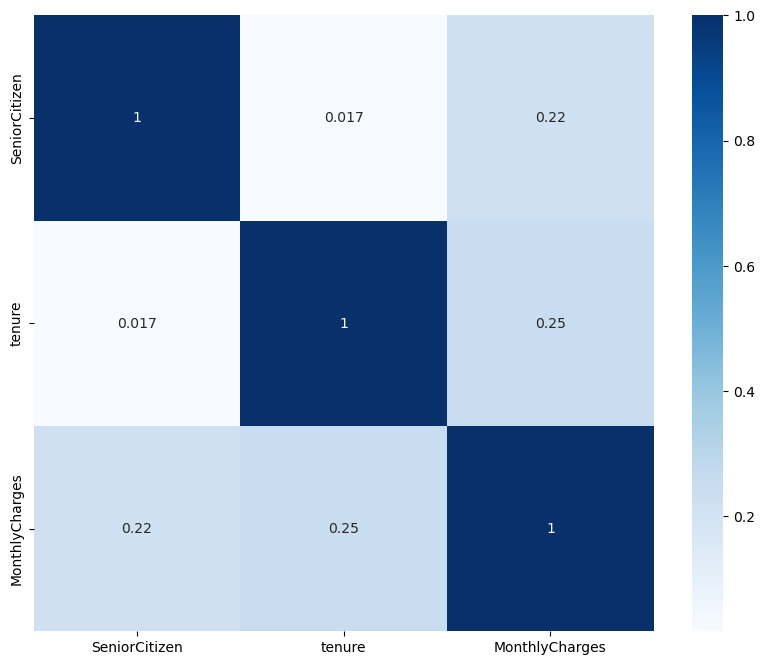

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

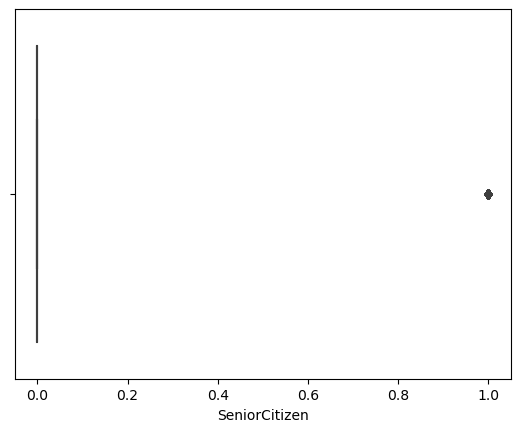

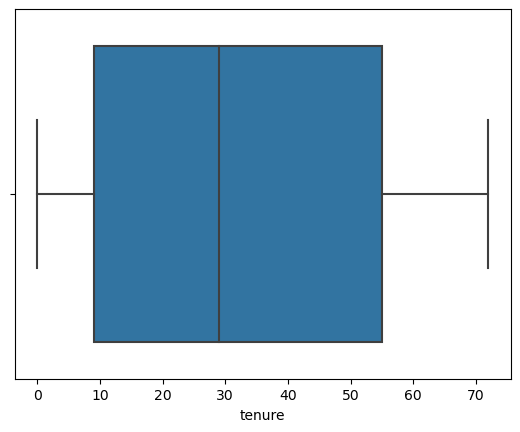

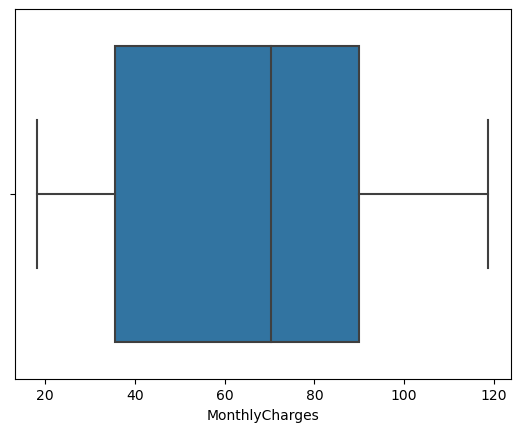

In [29]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(data=df,x=i)
        plt.show()
 

In [30]:
df['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

In [32]:
x = df[['tenure']]
y = df['MonthlyCharges']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=40)

In [34]:
model=LinearRegression()

In [36]:
model.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred = model.predict(x_test)

In [38]:
y_pred


array([75.99009865, 57.16386013, 69.71468581, ..., 58.59009032,
       62.01304278, 72.56714619])

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 820.913151897834
R-squared: 0.07654713297217808


In [40]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [43]:
error = y_test - y_pred


In [44]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Error in prediction:\n{error}")

Root Mean Squared Error (RMSE): 28.6515820138755
Error in prediction:
2180    19.509901
365     39.336140
45      14.785314
6149   -30.172876
5057    17.545156
          ...    
17      30.709901
1123    -1.268781
40      -9.040090
1485    34.686957
3915     8.682854
Name: MonthlyCharges, Length: 2113, dtype: float64


Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
x = df[['MonthlyCharges']]
y = df['Churn']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [48]:
model = LogisticRegression()

In [50]:
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(x_test)

In [53]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1797    0]
 [ 669    0]]


In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7287104622871047


Logistic Regression with multivaribale 

In [55]:
x = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [58]:
model2 = LogisticRegression()

In [59]:
model2.fit(x_train, y_train)

LogisticRegression()

In [62]:
y_pred = model2.predict(x_test)

In [63]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[921 104]
 [213 171]]


In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7750177430801988


Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
x = df[['tenure']]
y = df['Churn']


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [70]:
model3 = DecisionTreeClassifier(random_state=100)

In [71]:
model3.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

In [72]:
y_pred = model3.predict(x_test)

In [73]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[957  68]
 [275 109]]


In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7565649396735273


Radomforest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
model4 = RandomForestClassifier(random_state=42)

In [81]:
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
y_pred = model4.predict(X_test)

In [84]:
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [85]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1341  198]
 [ 308  266]]


In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7605300520586843
